<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_13_KNN_(_Zoo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np

In [145]:
url ='https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/Zoo.csv'

In [146]:
df = pd.read_csv(url)

In [147]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [149]:
df.isna().sum().sum()

0

In [150]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [151]:
df['animal name'].nunique()

100

Visual Expolaration

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

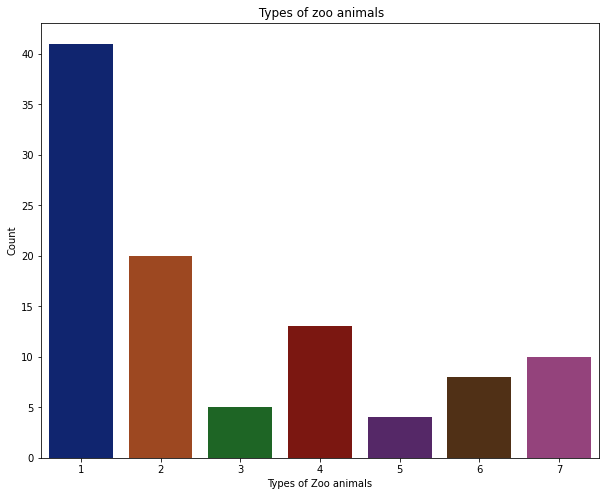

In [153]:
plt.figure(figsize=(10,8))
plt.title(" Types of zoo animals")
sns.countplot(data=df, x="type", palette = "dark")
plt.xlabel("Types of Zoo animals", fontsize=10)
plt.ylabel("Count", fontsize=10)

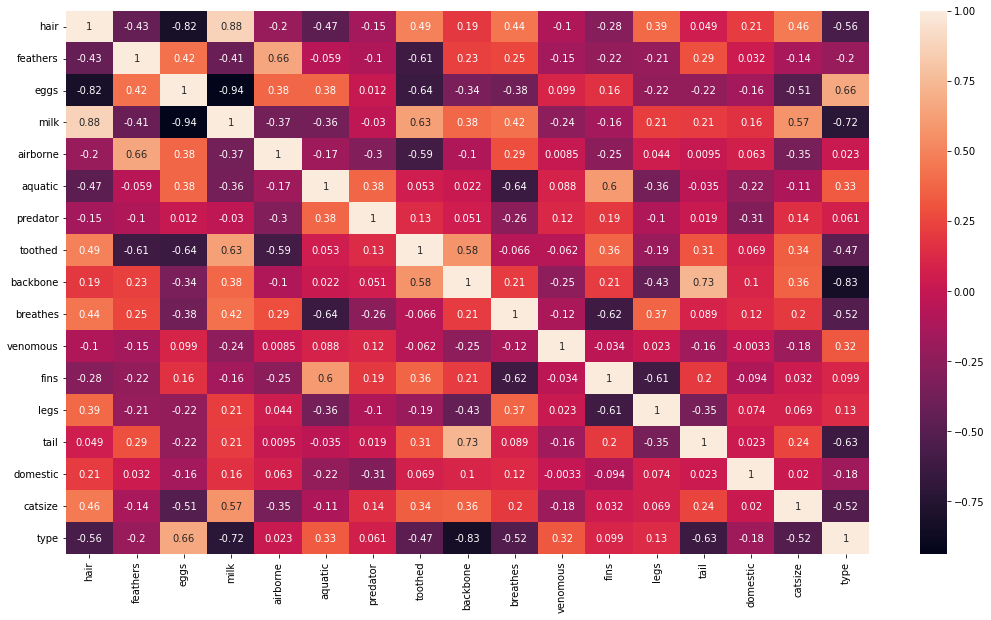

In [154]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

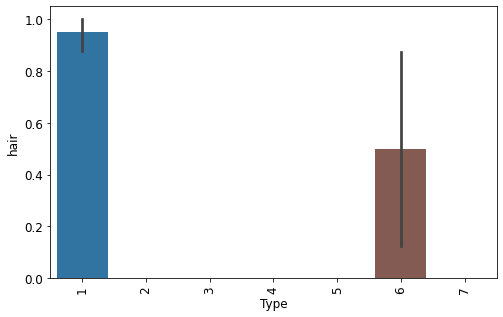

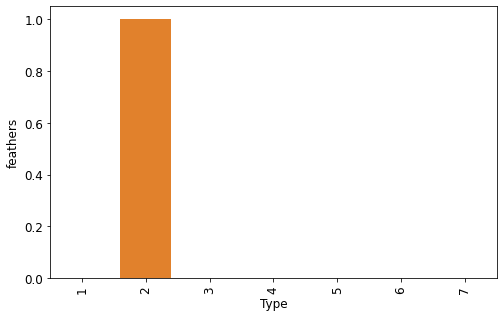

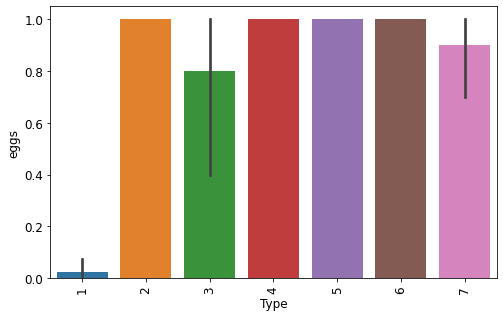

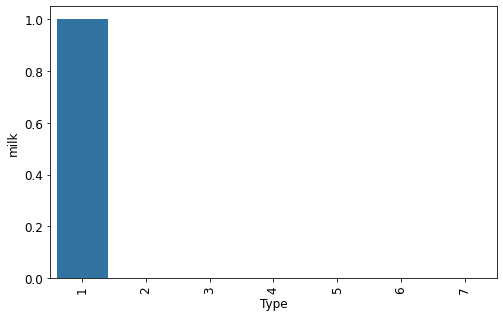

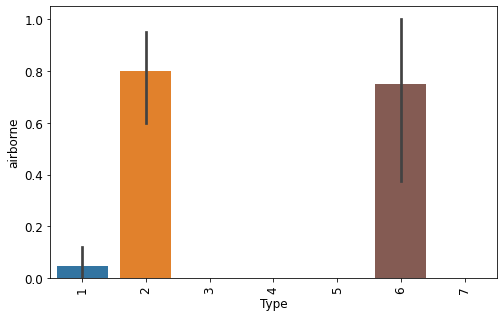

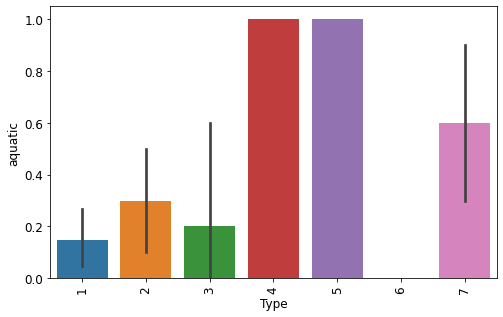

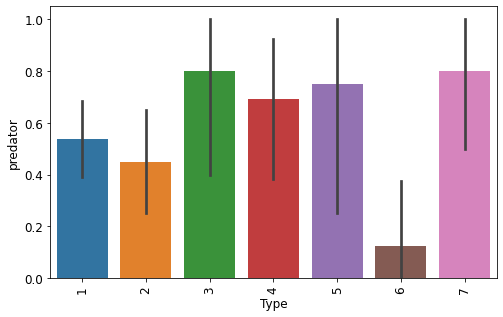

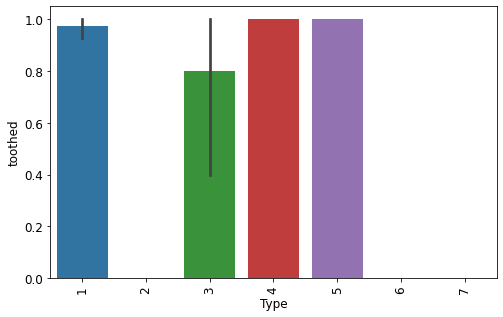

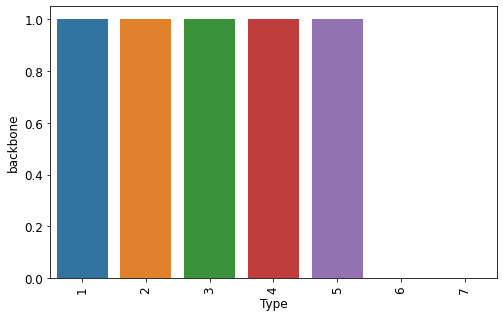

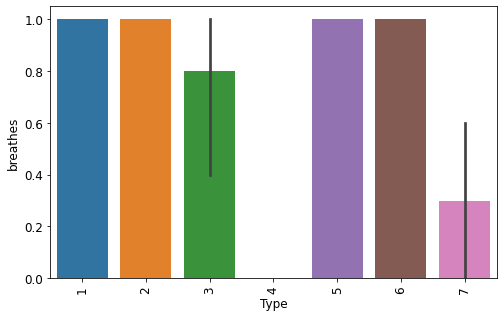

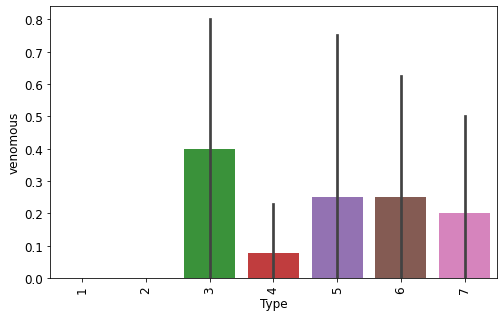

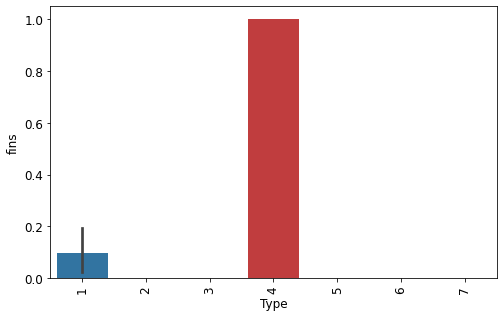

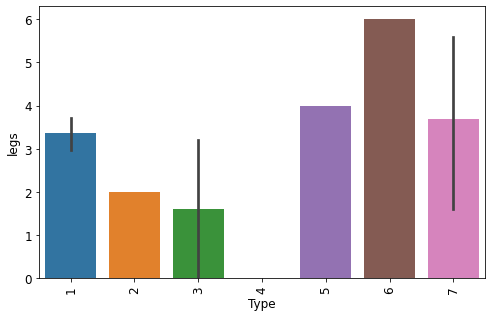

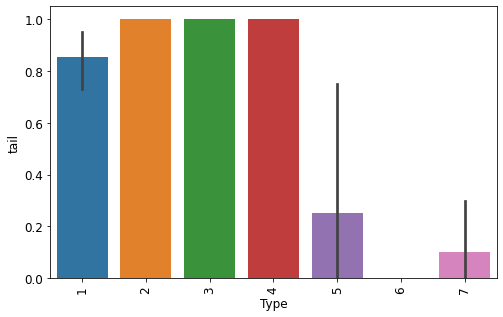

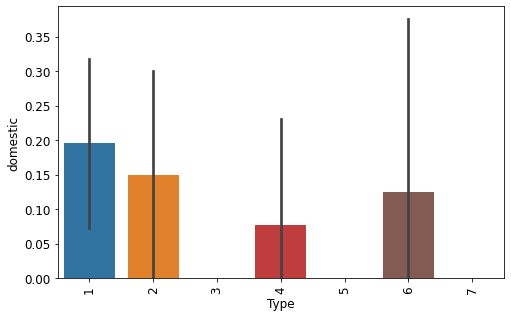

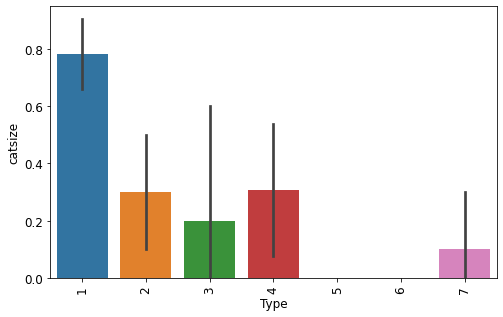

In [155]:
for i in df.columns[1:-1]:
    plt.figure(figsize=(8,5))
    sns.barplot(x = 'type', y= i, data = df)
    plt.xticks(rotation = 90, size = 12)
    plt.yticks(size = 12)
    plt.xlabel('Type',fontsize=12)
    plt.ylabel(i, fontsize=12)

    plt.show()

Dropping Cat column

In [156]:
data = df.drop('animal name', axis=1)

In [157]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


spliting data into training and testing

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('type', axis=1), data['type'], test_size=0.2, random_state=0)

In [160]:
print('Shape of X_train: ', x_train.shape)
print('Shape of X_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (80, 16)
Shape of X_test:  (21, 16)
Shape of y_train:  (80,)
Shape of y_test:  (21,)


Fitting data into model

In [161]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

In [162]:
model = KNeighborsClassifier(n_neighbors=7)

In [163]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [164]:
model.predict(x_test)

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2])

In [165]:
y_pred = model.predict(x_test)

In [166]:
mean_absolute_error(y_test, y_pred)

0.0

In [167]:
from sklearn.metrics import accuracy_score

In [168]:
acc= accuracy_score(y_test, y_pred)
print("The accuracy is  {}".format(acc))

The accuracy is  1.0


In [169]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
pred_df

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


Text(0, 0.5, 'Error Rate')

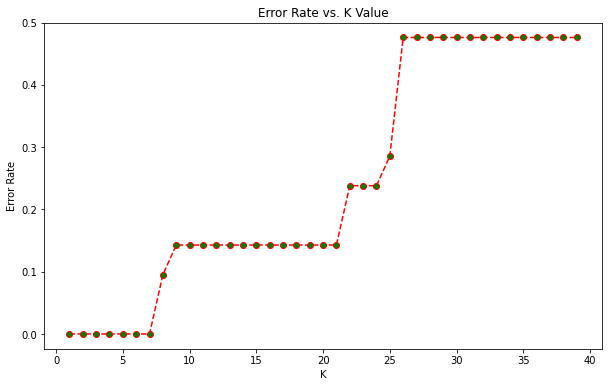

In [170]:
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predict=knn.predict(x_test)
    err_rate.append(np.mean(predict!=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [171]:
#for i in k_range:
  #knn_model = KNeighborsClassifier(n_neighbors=i)
  #knn_model.fit(x_train, y_train)
  #MEA = mean_absolute_error(knn_model.predict(x_test), y_test)
  #print(MEA)

Importing Cross Validation Score

In [172]:
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/mod

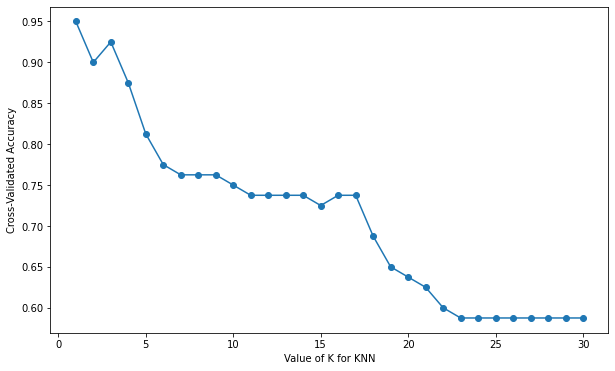

In [174]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [188]:
from sklearn.model_selection import GridSearchCV

In [184]:
# parameters selection

grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10, cv=6, n_jobs=-1)
gs_results = gs.fit(x_train, y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, 

In [185]:
gs_results.best_score_

0.9496336996336997

In [186]:
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

Final Model

In [190]:
model_final = gs_results.best_estimator_


pred_final = model_final.predict(x_test)
acc_final= accuracy_score(y_test,pred_final)
print("The accuracy is  {}".format(acc_final))

The accuracy is  1.0
